# Module 3 - Merging

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [2]:
python_features = np.loadtxt('Module3/data/PYTHON_FEATURES.csv', delimiter=',')
python_labels = np.loadtxt('Module3/data/PYTHON_LABELS.csv', delimiter=',')

print('python_features:', python_features.shape)
print('python_labels:', python_labels.shape)

matlab_features = np.loadtxt('Module3/data/MATLAB_FEATURES.csv', delimiter=',')
print('matlab_features:', matlab_features.shape)

python_features: (26730, 106)
python_labels: (26730,)
matlab_features: (26700, 63)


## Remove Samples that Failed in Matlab

In [3]:
FAIL = [5193, 5194, 5195, 5196, 5197, 5198, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5213, 5214, 5215, 5216, 5787, 5788, 5789, 5790, 5791, 5792, 5967, 5968, 5969, 5970, 5971, 5972];

python_features = np.delete(python_features, obj=FAIL, axis=0) 
python_labels = np.delete(python_labels, obj=FAIL, axis=0) 

print('python_features:', python_features.shape)
print('python_labels:', python_labels.shape)
print('matlab_features:', matlab_features.shape)

python_features: (26700, 106)
python_labels: (26700,)
matlab_features: (26700, 63)


## Merge Python and Matlab Features

In [4]:
# a = np.array([[1, 2, 3], [4, 5, 6]])
# b = np.array([[7, 8, 9], [10, 11, 12]])
# c = np.append(a, b, axis=1)
# print(a)
# print(b)
# print(c)

In [5]:
X = np.append(python_features, matlab_features, axis=1)
y = python_labels

print('X:', X.shape)
print('y:', y.shape)

# np.save('Module3/X.npy', X)
# np.save('Module3/y.npy', y)

X: (26700, 169)
y: (26700,)


## Scale Features

In [6]:
scaler = MinMaxScaler(feature_range=[0, 1])
X_scaled = scaler.fit_transform(X)

print('X_scaled:', X_scaled.shape)

# np.save('Module3/X_scaled.npy', X_scaled)

X_scaled: (26700, 169)


## Plot Class Counts

[Text(0,0.5,'Number of Samples'),
 Text(0.5,0,'Class'),
 Text(0.5,1,'Number of Samples per Class')]

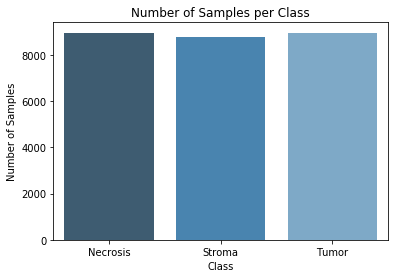

In [7]:
necrosis = np.where(y == 0)
stroma = np.where(y == 1)
tumor = np.where(y == 2)

ax = sb.barplot(x=['Necrosis', 'Stroma', 'Tumor'], y=[len(necrosis[0]), len(stroma[0]), len(tumor[0])], palette="Blues_d")
ax.set(xlabel='Class', ylabel='Number of Samples', title='Number of Samples per Class')

## PCA

9 components needed to explain 80.00% of variance
13 components needed to explain 85.00% of variance
19 components needed to explain 90.00% of variance
32 components needed to explain 95.00% of variance
49 components needed to explain 98.00% of variance
62 components needed to explain 99.00% of variance
105 components needed to explain 99.90% of variance


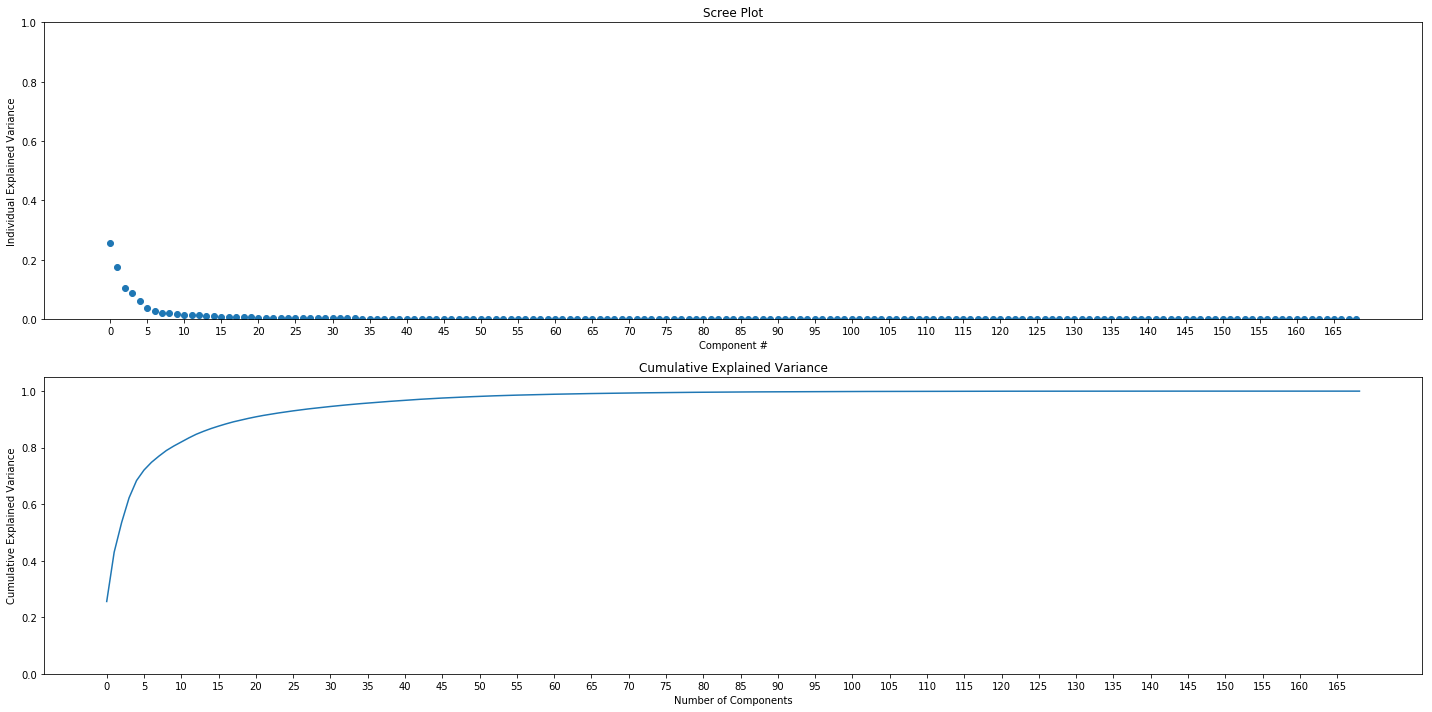

In [12]:
desired_explained_variance = [0.80, 0.85, .90, .95, .98, .99, .999]
num_features = X_scaled.shape[1]

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

ax1 = plt.subplot(2, 1, 1)
plt.xticks(np.arange(0, num_features, (1 if num_features < 10 else 5)))
plt.ylim(0, 1)
plt.xlabel('Component #')
plt.ylabel('Individual Explained Variance')
plt.title('Scree Plot')
plt.scatter(np.arange(0, num_features), explained_variance)

ax2 = plt.subplot(2, 1, 2)
plt.xticks(np.arange(0, num_features, (1 if num_features < 10 else 5)))
plt.ylim(0, 1.05)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.plot(np.cumsum(explained_variance))

plt.tight_layout()

for desired in desired_explained_variance:
    num_features_needed = np.where((np.cumsum(explained_variance) > desired) == 1)[0][0]
    line = '%d components needed to explain %.2f%% of variance' % (num_features_needed, desired*100)
    print(line)

In [23]:
desired_variance = 0.97

pca = PCA(n_components=2)
# pca = PCA(desired_variance)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print(X_pca.shape)
print('Explained Variance:', np.sum(pca.explained_variance_ratio_))

np.save('Module3/X_pca.npy', X_pca)

(26700, 2)
Explained Variance: 0.4302672969653915


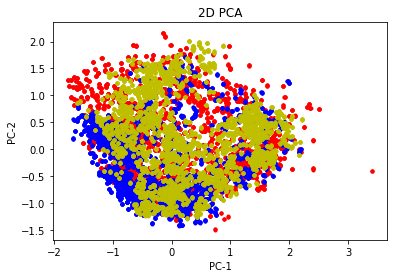

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_pca[necrosis, 0], X_pca[necrosis, 1], marker='.', color='r')
ax.scatter(X_pca[stroma, 0], X_pca[stroma, 1], marker='.', color='b')
ax.scatter(X_pca[tumor, 0], X_pca[tumor, 1], marker='.', color='y')

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_title('2D PCA')
plt.show()

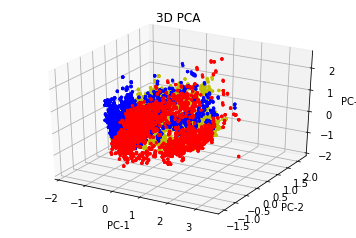

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[necrosis, 0], X_pca[necrosis, 1], X_pca[necrosis, 2], marker='.', color='r')
ax.scatter(X_pca[stroma, 0], X_pca[stroma, 1], X_pca[stroma, 2], marker='.', color='b')
ax.scatter(X_pca[tumor, 0], X_pca[tumor, 1], X_pca[tumor, 2], marker='.', color='y')

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
ax.set_title('3D PCA')
plt.show()

In [18]:
X_df = pd.DataFrame.from_records(X_scaled)
pca_df = pd.DataFrame.from_records(X_pca)

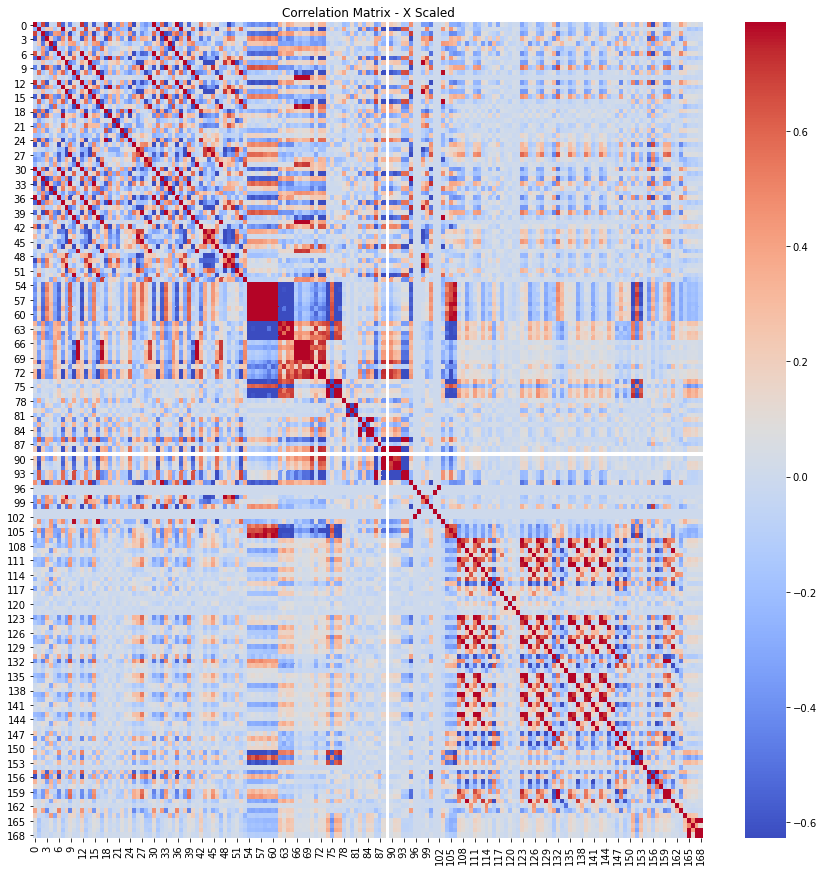

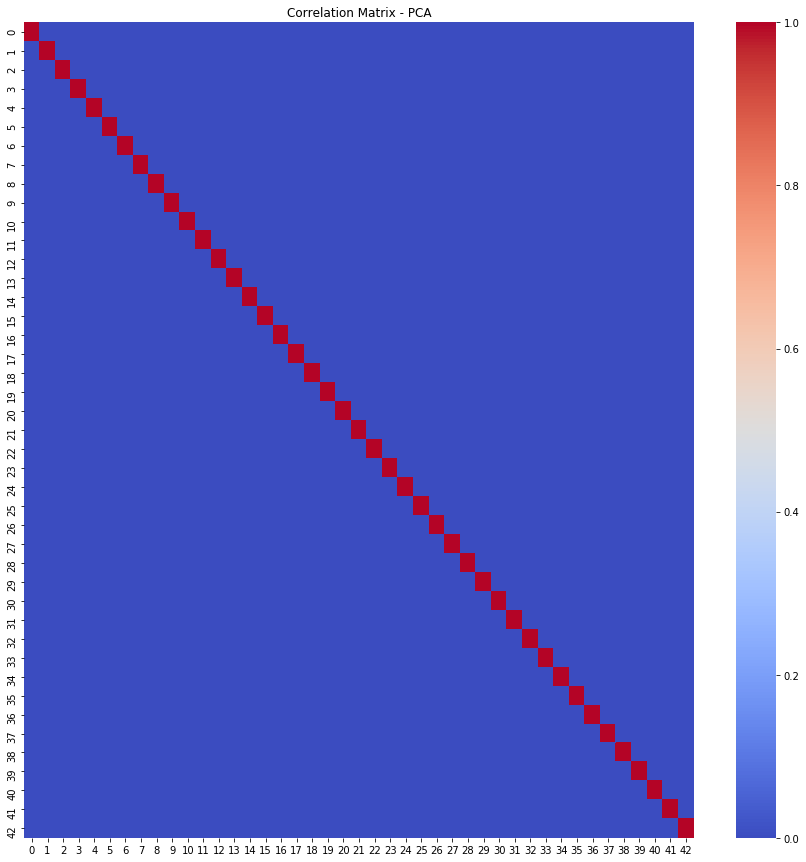

In [19]:
correlation = X_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(correlation, ax=ax, cmap='coolwarm', robust=True, cbar=True)
plt.title('Correlation Matrix - X Scaled')
plt.show()

correlation = pca_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(correlation, ax=ax, cmap='coolwarm', robust=True, cbar=True)
plt.title('Correlation Matrix - PCA')
plt.show()